In [1]:
import pandas as pd # data pre-processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # import it for numerical computation on data 
import matplotlib.pyplot as plt ## data viz libraries 
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly

In [2]:
init_notebook_mode(connected=True)

In [3]:
df=pd.read_csv('bitcoin_price_Training - Training.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
 df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Day_name']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Month_name']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year



In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day,Day_name,Month,Month_name,Year
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000",31,Monday,7,July,2017
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000",30,Sunday,7,July,2017
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000",29,Saturday,7,July,2017
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000",28,Friday,7,July,2017
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000",27,Thursday,7,July,2017


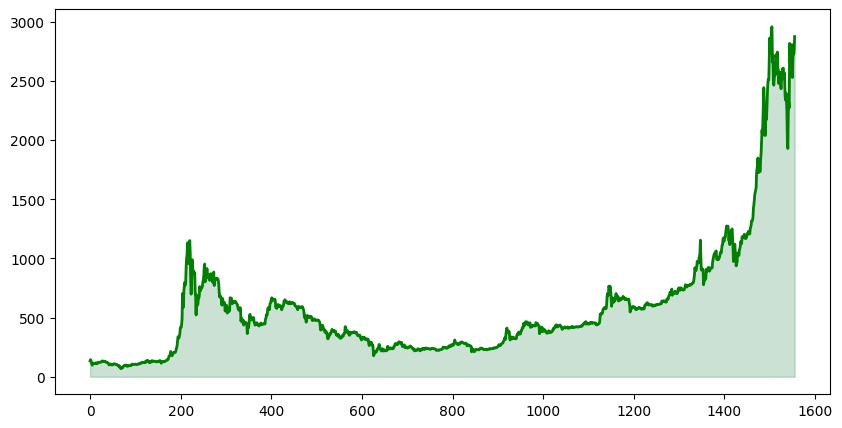

In [7]:
fig,ax=plt.subplots(figsize=(10,5))
sort_index=df.sort_index(ascending=False)
ax.plot(sort_index.index,df['Close'],color='green',lw=2)
ax.fill_between(sort_index.index, df['Close'], color='seagreen', alpha=0.25)


In [8]:
candlestick = go.Candlestick(x=df['Date'],open=df['Open'],close=df['Close'],high=df['High'],low=df['Low'],)

In [9]:
fig=go.Figure(candlestick)
fig.update_layout(width=1100,height=500,margin=dict(l=0,r=30,t=40,b=40),title='Bitcoin historical data')


In [10]:
df.set_index('Date',inplace=True) 

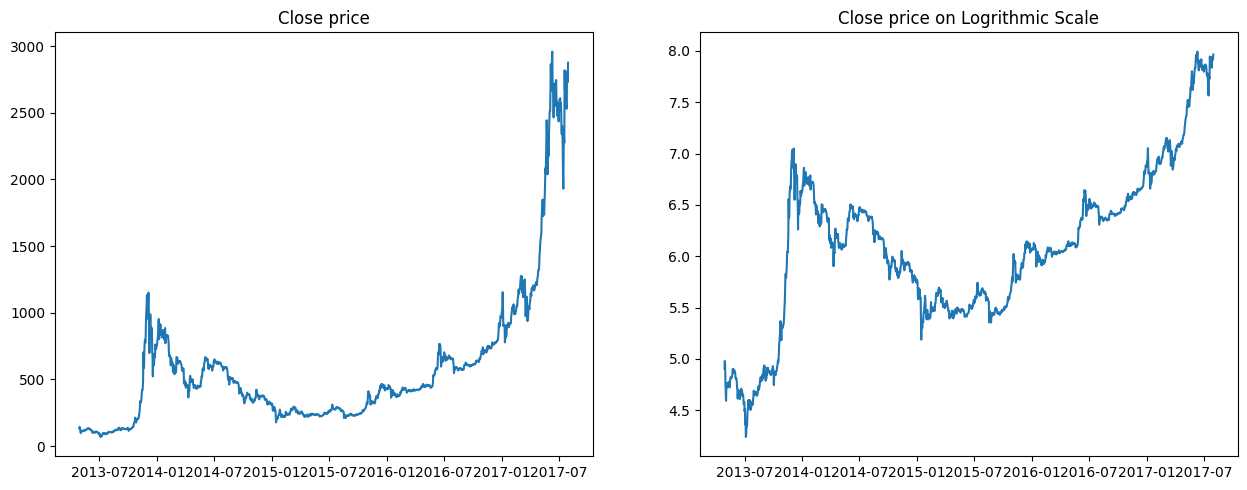

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(df['Close'])
ax1.set_title('Close price')
ax2.plot(np.log1p(df['Close']))
ax2.set_title('Close price on Logrithmic Scale')
plt.tight_layout()
plt.subplots_adjust(left=0,wspace=0.2)

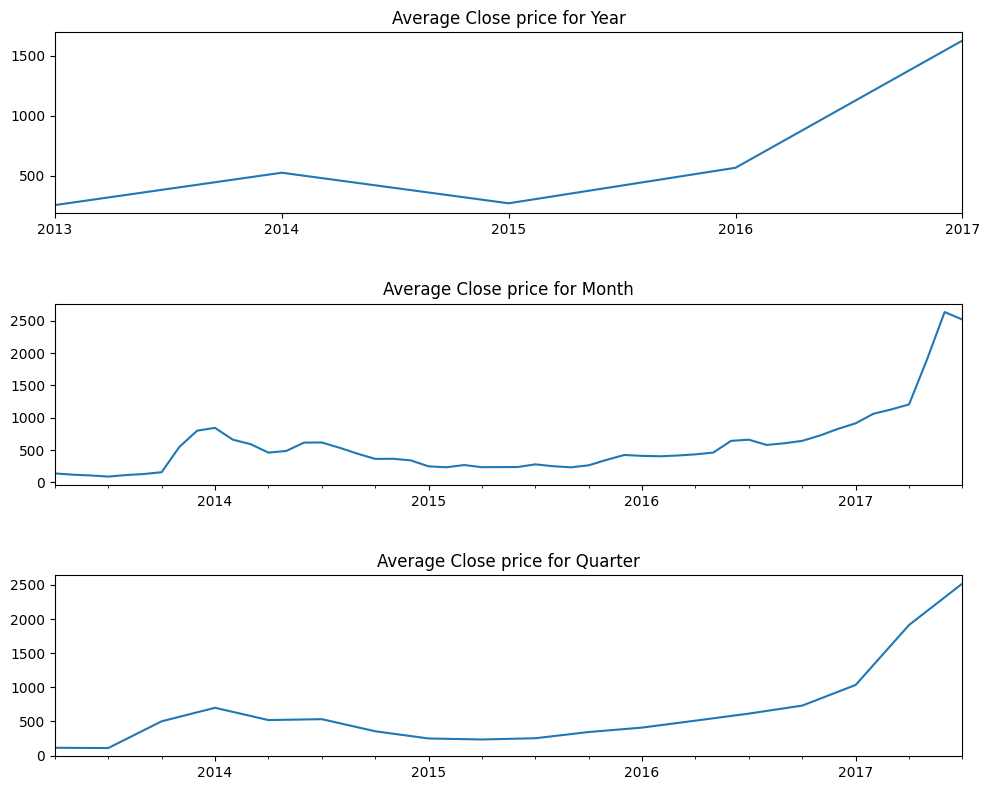

In [12]:
interval={'YE':'Year','ME':'Month','QE':'Quarter'}
plt.figure(figsize=(10,8))
for index,key in enumerate(interval,start=1):
    plt.subplot(3,1,index)
    df['Close'].resample(key).mean().plot()
    plt.title('Average Close price for '+interval[key])
    plt.xlabel('') 
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

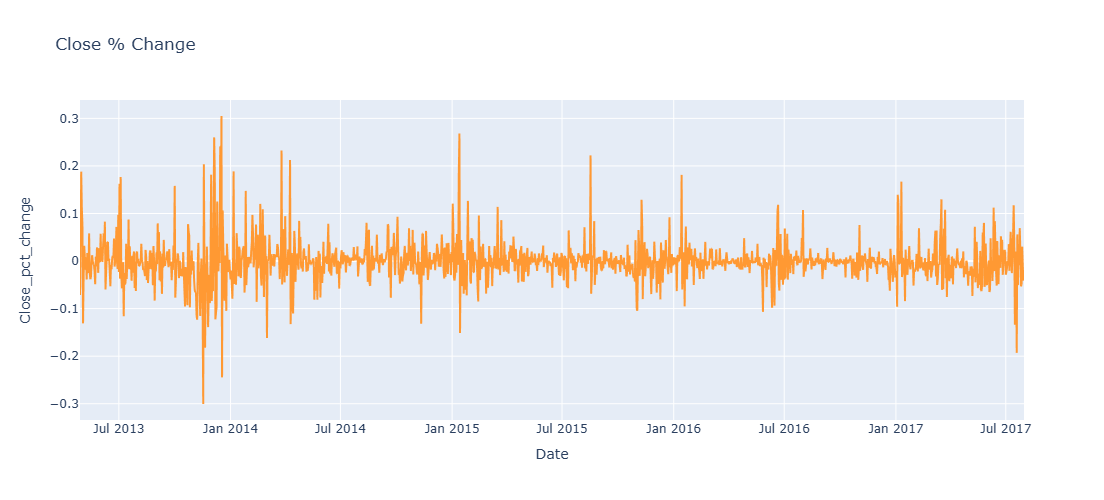

In [14]:

df['Close_pct_change']=df['Close'].pct_change()
fig = px.line(df, y="Close_pct_change", title="Close % Change",height=500,width=1000)
fig.update_traces(line=dict(color="rgb(255,153,51)"))
fig.show()

